<a href="https://colab.research.google.com/github/matheus-ramos-medeiros/Data_Viking/blob/main/Analise_Petrobas_Data_Viking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vamos Analisar a Ação da Petrobas**






## **API Yahoo Finance**

Para isso vamos usar o API famoso do Mercado Financeiro, onde vamos pegar os dados de uma maneira fácil e rapida.

O nome do nosso API é [yfinance](https://pypi.org/project/yfinance/) que oferece uma maneira segmentada e Pythonic de baixar dados de mercado do Yahoo!Ⓡ finanças.

In [25]:
#instalar os pacotes

!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
#Pacotes analises de dados
import pandas as pd
import pandas_datareader.data as web
import numpy as np

#Pacotes analises graficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Funcao para datas
from datetime import datetime

#YFinance
import yfinance as yf
yf.pdr_override()

#Avisos
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Coletando os dados
Dados = web.get_data_yahoo('PETR4.SA', period='1y')

# Shape
Dados.shape
print('Os dados tem',Dados.shape[0],'linhas e',Dados.shape[1],'colunas.')

[*********************100%***********************]  1 of 1 completed
Os dados tem 250 linhas e 6 colunas.


In [28]:
#verificando as 5 primeiras linhas no dataframe
Dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,34.799999,35.290001,32.680000,33.389999,19.513243,139674100
2022-02-25,33.450001,34.000000,32.900002,34.000000,19.869728,86189100
2022-03-02,35.259998,35.290001,34.389999,34.669998,20.261278,58071800
2022-03-03,34.820000,34.930000,34.160000,34.240002,20.009989,69237400
2022-03-04,34.080002,34.680000,33.820000,34.230000,20.004143,55418000


In [29]:
#verificando as 5 ultimas linhas no dataframe
Dados.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-16,26.60,26.950001,26.490000,26.850000,26.850000,44115700
2023-02-17,26.67,26.670000,26.370001,26.440001,26.440001,61085700
2023-02-22,26.00,26.110001,25.690001,25.760000,25.760000,38608500
2023-02-23,25.77,26.790001,25.770000,26.549999,26.549999,73913400
2023-02-24,26.67,26.700001,25.870001,25.900000,25.900000,64409100


In [30]:
# Estatistica descritiva
Dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,29.697840,30.229120,29.160440,29.709640,23.652381,8.170353e+07
std,3.665291,3.691001,3.612697,3.648733,3.489590,3.715291e+07
min,21.000000,22.110001,20.770000,21.469999,17.537958,2.876520e+07
25%,26.585000,27.065000,26.067500,26.700001,20.342243,5.610505e+07
50%,30.415000,30.710000,29.815000,30.090000,23.754831,7.266990e+07
75%,32.599998,33.105000,32.017501,32.557501,26.238671,9.660060e+07
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [31]:
# Informações
Dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-02-24 to 2023-02-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


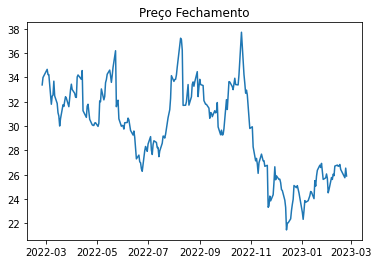

In [32]:
#Plotando um gráfico simples
plt.plot(Dados['Close'])
plt.title('Preço Fechamento');

## Media Móvel

A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo.

A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência.

E como fazer esse cálculo?
<br>
Basta utilizar a fórmula:
MMA = Soma dos preços de fechamento ÷ Número de dias 

**Função rolling**

A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados. <br>
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

In [33]:
#Media Movel
from pandas.core import window
periodo = 5
Dados['Close'].rolling(window= periodo).mean()

Date
2022-02-24       NaN
2022-02-25       NaN
2022-03-02       NaN
2022-03-03       NaN
2022-03-04    34.106
               ...  
2023-02-16    26.762
2023-02-17    26.706
2023-02-22    26.498
2023-02-23    26.468
2023-02-24    26.300
Name: Close, Length: 250, dtype: float64

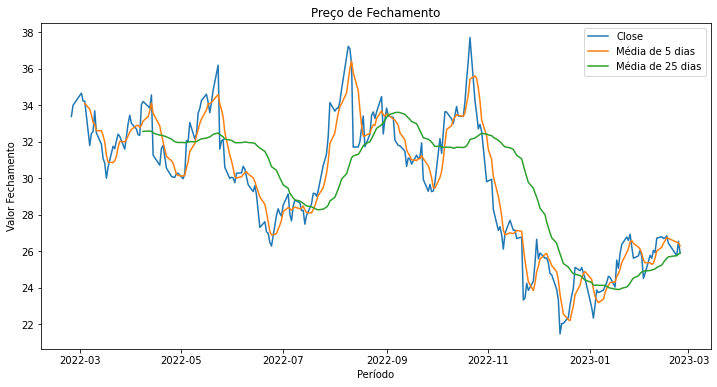

In [34]:
# Grafico Simples com Média Movel
plt.figure(figsize=(12,6))
plt.plot(Dados['Close'])
plt.plot(Dados['Close'].rolling(window = periodo).mean())
plt.plot(Dados['Close'].rolling(window = periodo + 25).mean())
plt.title("Preço de Fechamento")
plt.xlabel('Período')
plt.ylabel('Valor Fechamento')
plt.legend(['Close','Média de 5 dias','Média de 25 dias'])
plt.show()

In [35]:
# adicinando a media movel na base de dados

Dados['Media_Movel'] = Dados['Close'].rolling( window = periodo).mean()
Dados

,Open,High,Low,Close,Adj Close,Volume,Media_Movel
Date,,,,,,,
2022-02-24,34.799999,35.290001,32.680000,33.389999,19.513243,139674100,NaN
2022-02-25,33.450001,34.000000,32.900002,34.000000,19.869728,86189100,NaN
2022-03-02,35.259998,35.290001,34.389999,34.669998,20.261278,58071800,NaN
2022-03-03,34.820000,34.930000,34.160000,34.240002,20.009989,69237400,NaN
2022-03-04,34.080002,34.680000,33.820000,34.230000,20.004143,55418000,34.106
...,...,...,...,...,...,...,...
2023-02-16,26.600000,26.950001,26.490000,26.850000,26.850000,44115700,26.762
2023-02-17,26.670000,26.670000,26.370001,26.440001,26.440001,61085700,26.706
2023-02-22,26.000000,26.110001,25.690001,25.760000,25.760000,38608500,26.498


## **Plotly**

O PLOTLY é uma biblioteca Python de plotagem 
interativa e de código aberto que oferece suporte a 
mais de 40 tipos de gráficos exclusivos, abrangendo 
uma ampla variedade de casos de uso estatísticos, 
financeiros, geográficos, científicos e 
tridimensionais.

**plotly.express : (px)** é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.<br>
**plotly.graph_objects : (go)** é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.

In [36]:
#Grafico interativo Simples
Figure = px.line(
    Dados,
    y="Close",
    title = 'Fechamento'
    )
Figure.show()

## **Candlestick Charts**
<br>
É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

In [37]:
# Grafico clandestik
Grafico_Candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Open'],
            high=Dados['High'],
            low=Dados['Low'],
            close=Dados['Close'],
            increasing_line_color='green',
            decreasing_line_color='red'
        )
    ]
)


Grafico_Candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Periodo',
    yaxis_title='Preço de Fechamento'
)


Grafico_Candlestick.show()

## **Criando Relátorio**

In [38]:
#Criando a figura
Figura = make_subplots(
    rows=2,
    cols=1,
    specs=[
          [{'type':'scatter'}],
          [{'type':'scatter'}] 
    ],
    vertical_spacing = 0.075,
    shared_xaxes = True,
    subplot_titles = ('Cotação', 'Fechamento')

)

# Layout e Dimensão
Figura.update_layout(
    width=1000,
    height=800,
    title_text='<b>Advanced Analytics</b> <br>Follow-up Petrobras'
)

# Adicionado um gráfico na 1º Posição
Figura.add_trace(
        go.Candlestick(
        x = Dados.index,
        open = Dados['Open'],
        high = Dados['High'],
        low = Dados['Low'],
        close = Dados['Close'],
        increasing_line_color = 'green',
        decreasing_line_color = 'red'
        ),
    row=1, col=1
)
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode= 'lines',
        name=" Média Movel",
        line=dict(color = 'yellow')
    )
)
Figura.update_layout(
xaxis_rangeslider_visible=False
)


# Adicionado um gráfico na 2º Posição
Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

Figura.add_trace(
    go.Scatter(
        x=Dados.index,
        y=Dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='red')
    ),
    row=2, col=1
)

#configurando a legenda
Figura.update_layout(
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.05,
        xanchor='right',
        x=1,
        font=dict( size=10) 
    )
)

# colocando o rodape
Figura.add_annotation(
    showarrow=False,
    text='Análise feita no evento de Python',
    font=dict(size=14),
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

Figura.add_annotation(
    showarrow=False,
    text='By: Matheus Medeiros',
    font=dict(size=14),
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)



Figura.show()

## **Exportando PDF**

**Kaleido** <br>
Kaleido é uma biblioteca de plataforma cruzada para geração de imagens estáticas (por exemplo, png, svg, pdf, etc.) para bibliotecas de visualização baseadas na web, com foco particular na eliminação de dependências externas. O foco inicial do projeto é a exportação de imagens plotly.js do Python para uso por plotly.py, mas ele foi projetado para ser relativamente direto para estender a outras bibliotecas de visualização baseadas na web e outras linguagens de programação. O foco principal do Kaleido (pelo menos inicialmente) é servir como uma dependência de bibliotecas de visualização baseadas na web, como plotly.py. Como tal, o foco está em fornecer uma API programática, em vez de amigável ao usuário.

In [13]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
Figura.write_image("Report_Financeiro.pdf")